In [147]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

t = md.load_trr('15ns_MD_prod_run/md_adp.trr',top='15ns_MD_prod_run/md_adp.gro')

phi = md.compute_phi(t)
psi = md.compute_psi(t)

time = np.array(t.time)/1000   # in ns

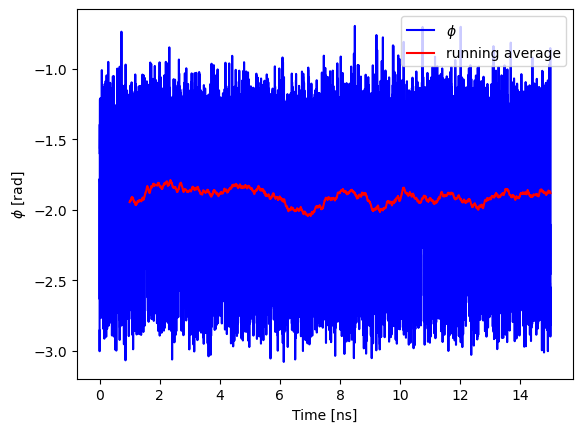

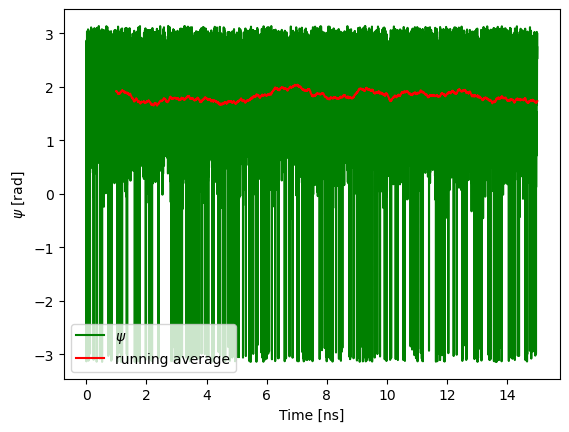

In [148]:
def moving_average(a, n):
    N = len(a)
    return np.array([np.mean(a[i:i+n]) for i in np.arange(0,N-n+1)])

plt.figure()
plt.plot(time,phi[1],'-b',label=r'$\phi$')
plt.plot(time[999:], moving_average(phi[1], 1000), color = 'red', label = 'running average')
plt.xlabel('Time [ns]')
plt.ylabel(r'$\phi$ [rad]')
# plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/phi_angle_adp_15ns_MD_run.jpg')

plt.figure()
plt.plot(time,psi[1],'-g',label=r'$\psi$')
plt.plot(time[999:], moving_average(psi[1], 1000), color = 'red', label = 'running average')
plt.xlabel('Time [ns]')
plt.ylabel(r'$\psi$ [rad]')
# plt.ylim([0,5])
plt.legend()

plt.savefig('Figures/psi_angle_adp_15ns_MD_run.jpg')


/state/partition1/job-51598013/ipykernel_4111853/148403087.py:2: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


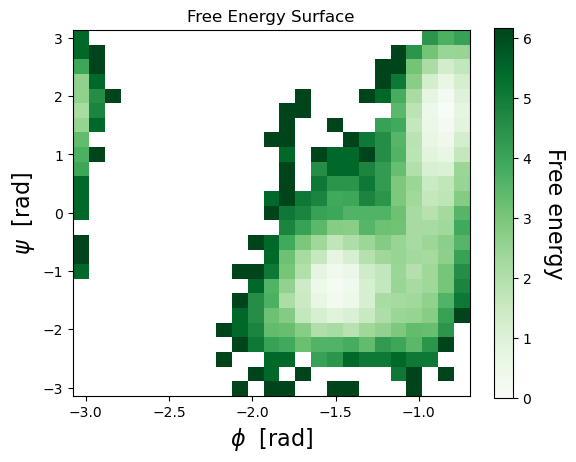

In [149]:
F, phi_edges, psi_edges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins=25)
F = -np.log(F)
F_plt = F - np.min(F)

#print(F_plt)

#plt.imshow(phi[0],psi[0])
x = phi[1].flatten()
y = psi[1].flatten()
z = F_plt
#z_min, z_max = -np.abs(z).max(), np.abs(z).max() 

plt.figure()
c = plt.imshow(F_plt, cmap ='Greens', #vmin = z_min, vmax = z_max, 
                 extent =[x.min(), x.max(), y.min(), y.max()], aspect=0.35)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Free Energy Surface')


cbar = plt.colorbar(c)

cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Free energy', rotation=270, fontsize=16)

plt.savefig('Figures/FES_adp_15ns_MD_run.jpg')

In [146]:
def FES(traj):

    phi = md.compute_phi(traj)[1].flatten()
    psi = md.compute_psi(traj)[1].flatten()

    F, phi_edges, psi_edges = np.histogram2d(phi, psi.flatten(), bins=25)
    F = -np.log(F)
    F_plt = F - np.min(F)

    return F_plt, phi, psi

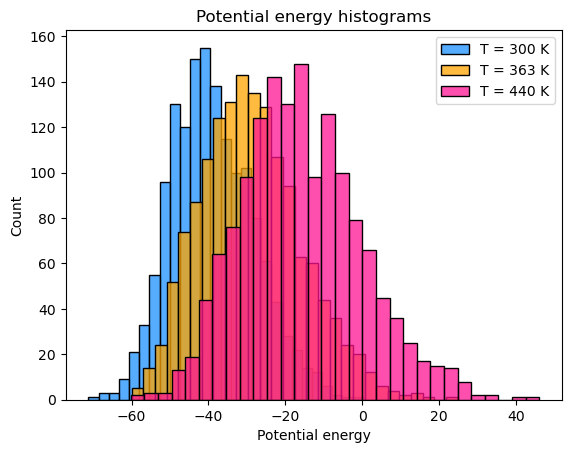

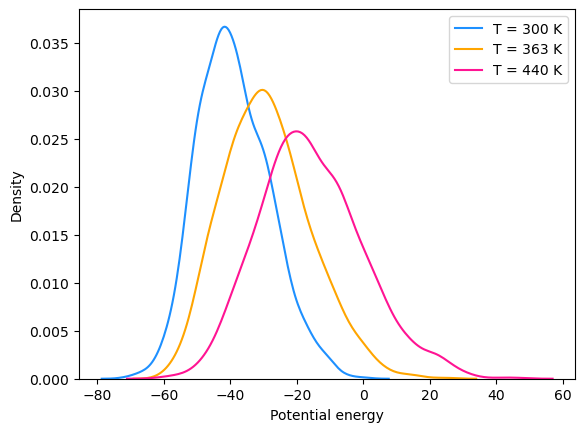

In [144]:
# Potential energy histograms for each replica 

# x, y = np.loadtxt("T300/potential_energy.xvg",comments=["#","@"],unpack=True)
# plt.hist(y, label = 'T = 300 K')
# plt.xlabel('Potential energy')
# plt.title('Potential energy histogram at T = 300 K')

# x, y = np.loadtxt("T363/potential_energy.xvg",comments=["#","@"],unpack=True)
# plt.hist(y, label = 'T = 363 K')
# plt.xlabel('Potential energy')
# plt.title('Potential energy histogram at T = 363 K')

# x, y = np.loadtxt("T440/potential_energy.xvg",comments=["#","@"],unpack=True)
# plt.hist(y, label = 'T = 440 K')
# plt.xlabel('Potential energy')
# plt.title("Potential energy histograms")
# plt.legend()

import seaborn as sns

x1, y1 = np.loadtxt("T300/potential_energy.xvg",comments=["#","@"],unpack=True)
x2, y2 = np.loadtxt("T363/potential_energy.xvg",comments=["#","@"],unpack=True)
x3, y3 = np.loadtxt("T440/potential_energy.xvg",comments=["#","@"],unpack=True)

plt.figure()
sns.histplot(y1, color="dodgerblue", label="T = 300 K")
sns.histplot(y2, color="orange", label="T = 363 K")
sns.histplot(y3, color="deeppink", label="T = 440 K")
plt.title("Potential energy histograms")
plt.xlabel('Potential energy')
plt.legend()

plt.savefig('Figures/replicas_PotE_histograms.jpg')

plt.figure()
sns.kdeplot(y1, color="dodgerblue", label="T = 300 K")
sns.kdeplot(y2, color="orange", label="T = 363 K")
sns.kdeplot(y3, color="deeppink", label="T = 440 K")
plt.xlabel('Potential energy')
plt.legend()

plt.savefig('Figures/replicas_PotE_distributions.jpg')

/state/partition1/job-51598013/ipykernel_4111853/1974522750.py:7: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


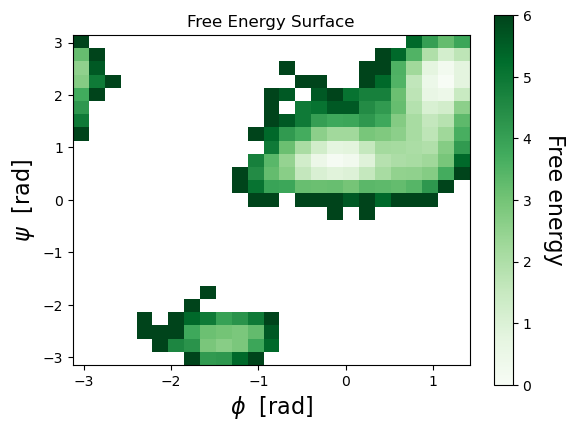

In [143]:
# FES for T = 300 K replica

t_300 = md.load_trr('T300/adp_exchange3temps.trr',top='T300/adp_exchange3temps.gro')

F_plt, phi, psi = FES(t_300)
    
x = phi
y = psi

plt.figure()
c = plt.imshow(F_plt, cmap ='Greens', vmax = 6, 
                 extent =[x.min(), x.max(), y.min(), y.max()], aspect=0.6)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Free Energy Surface')


cbar = plt.colorbar(c)

cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Free energy', rotation=270, fontsize=16)

plt.savefig('Figures/FES_T300.jpg')

/state/partition1/job-51598013/ipykernel_4111853/1974522750.py:7: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


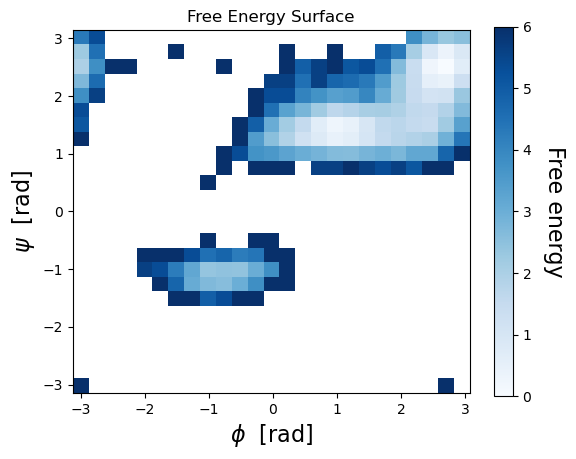

In [142]:
# FES for T = 300 K replica

t_363 = md.load_trr('T363/adp_exchange3temps.trr',top='T363/adp_exchange3temps.gro')

F_plt, phi, psi = FES(t_363)
    
x = phi
y = psi

plt.figure()
c = plt.imshow(F_plt, cmap ='Blues', vmax = 6, 
                 extent =[x.min(), x.max(), y.min(), y.max()], aspect=0.9)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Free Energy Surface')


cbar = plt.colorbar(c)

cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Free energy', rotation=270, fontsize=16)

plt.savefig('Figures/FES_T363.jpg')

/state/partition1/job-51598013/ipykernel_4111853/1974522750.py:7: RuntimeWarning: divide by zero encountered in log
  F = -np.log(F)


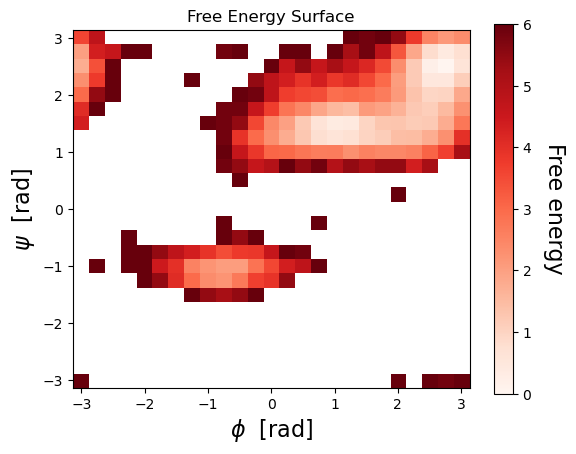

In [141]:
# FES for T = 300 K replica

t_440 = md.load_trr('T440/adp_exchange3temps.trr',top='T440/adp_exchange3temps.gro')

F_plt, phi, psi = FES(t_440)
    
x = phi
y = psi

plt.figure()
c = plt.imshow(F_plt, cmap ='Reds', vmax = 6, 
                 extent =[x.min(), x.max(), y.min(), y.max()], aspect=0.9)
plt.xlabel(r'$\phi$  [rad]',fontsize=16)
plt.ylabel(r'$\psi$  [rad]',fontsize=16)
plt.title('Free Energy Surface')


cbar = plt.colorbar(c)

cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_ylabel('Free energy', rotation=270, fontsize=16)

plt.savefig('Figures/FES_T440.jpg')

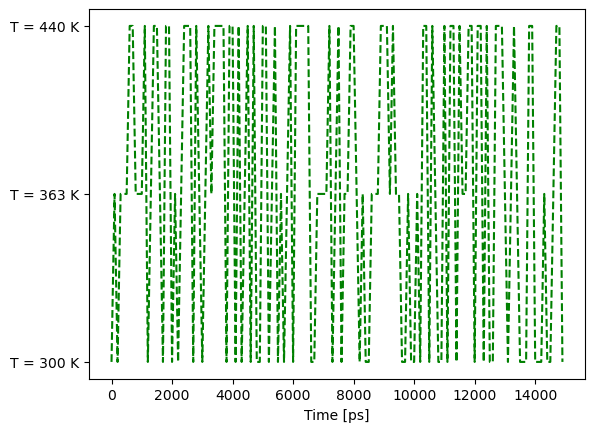

In [139]:
t, x1, x2, x3 = np.loadtxt("T300/replica_temp.xvg",comments=["#","@"],unpack=True)

plt.plot(t[::100],x1[::100],ls='--', color = 'g')
plt.yticks([0, 1, 2], ['T = 300 K', 'T = 363 K', 'T = 440 K'])
plt.xlabel('Time [ps]')

plt.savefig('Figures/replicas_exchange_in_time.jpg')